# Coronavirus Basic Data Analysis-global

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rc, rcParams
from plotFunction import casePlot

Dataset: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

# Read Data

In [2]:
# reading data from the csv file
df= pd.read_csv("2019_nCoV_data.csv")
# data clean
df.drop(["Sno","Last Update"], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].apply(lambda x:x.date())
df.loc[df['Country']=='Mainland China','Country']='China'
df.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,China,1.0,0.0,0.0
1,2020-01-22,Beijing,China,14.0,0.0,0.0
2,2020-01-22,Chongqing,China,6.0,0.0,0.0
3,2020-01-22,Fujian,China,1.0,0.0,0.0
4,2020-01-22,Gansu,China,0.0,0.0,0.0


In [3]:
df.tail()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
1714,2020-02-17,"Madison, WI",US,1.0,0.0,0.0
1715,2020-02-17,"Orange, CA",US,1.0,0.0,0.0
1716,2020-02-17,"San Antonio, TX",US,1.0,0.0,0.0
1717,2020-02-17,"Seattle, WA",US,1.0,0.0,1.0
1718,2020-02-17,"Tempe, AZ",US,1.0,0.0,0.0


In [4]:
#listing all the countries where the virus has spread
country_list=list(df['Country'].unique())
print(country_list)

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium', 'Others', 'Egypt']


# Data preprocessing

In [5]:
df_stat = df.groupby(['Date']).sum().reset_index(drop=None)
df_stat['Daily_confirmed_cases']=df_stat.Confirmed.diff()
df_stat['Daily_deaths']=df_stat.Deaths.diff()
df_stat['Daily_recoveries']=df_stat.Recovered.diff()
df_stat['death_rate']=df_stat.apply(lambda x: x['Deaths']*100/(x['Confirmed']), axis=1)
df_stat.head()

,Date,Confirmed,Deaths,Recovered,Daily_confirmed_cases,Daily_deaths,Daily_recoveries,death_rate
0,2020-01-22,555.0,0.0,0.0,NaN,NaN,NaN,0.000000
1,2020-01-23,653.0,18.0,30.0,98.0,18.0,30.0,2.756508
2,2020-01-24,941.0,26.0,36.0,288.0,8.0,6.0,2.763018
3,2020-01-25,2019.0,56.0,49.0,1078.0,30.0,13.0,2.773650
4,2020-01-26,2794.0,80.0,54.0,775.0,24.0,5.0,2.863278


# Plot graphs

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Dates')

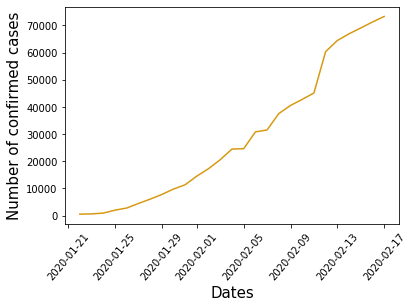

In [6]:
#plotting confirmed cases over time
plt.plot('Date', 'Confirmed', data=df_stat, color='#D79913')
plt.xticks(rotation=50)
plt.ylabel('Number of confirmed cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)

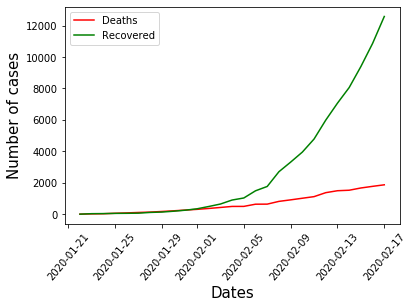

In [7]:
#plotting two line plots for deaths and recoveries respectively
plt.plot('Date', 'Deaths', data=df_stat, color='red')
plt.plot('Date', 'Recovered', data=df_stat, color='green')
plt.xticks(rotation=50)
plt.ylabel('Number of cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.legend()
plt.show()

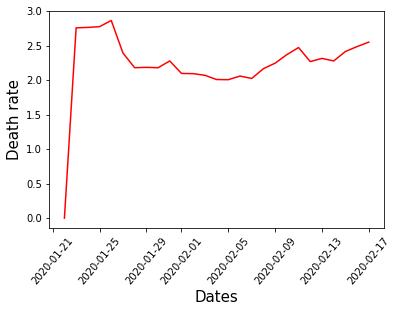

In [8]:
plt.plot('Date','death_rate',data=df_stat, color='red')
plt.xticks(rotation=50)
plt.ylabel('Death rate',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.show()

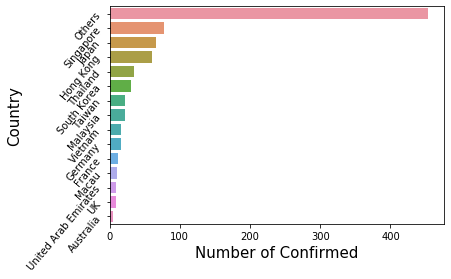

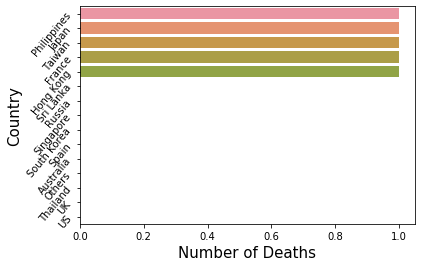

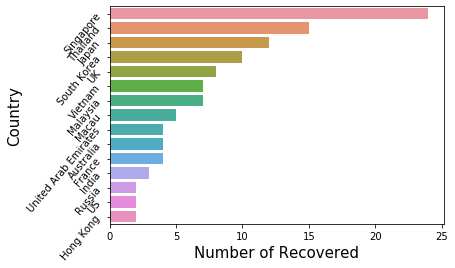

In [9]:
# analysis country exclude China
df_byCountry = df[df['Country']!='China']
casePlot(df_byCountry, 'Country', 'Confirmed')
casePlot(df_byCountry, 'Country', 'Deaths')
casePlot(df_byCountry, 'Country', 'Recovered')
